In [1]:
import sys
sys.path.append("./")
import pandas as pd
import numpy as np
from settings import settings, paths
import os
import muffin
import scanpy as sc


In [33]:
pbmc_muffin = sc.read_h5ad("10k_pbmcs_results/dataset.h5ad")
clusters_seurat = pd.read_csv("benchmarks/scrnaseq/10k_pbmc_seurat_clusters.csv", sep=",", index_col=0)
clusters_sct = pd.read_csv("benchmarks/scrnaseq/10k_pbmc_sct_clusters.csv", sep=",", index_col=0)
clusters_scanpy = pd.read_csv("benchmarks/scrnaseq/10k_pbmc_scanpy_clusters.csv", sep=",", index_col=0)["leiden"]

In [35]:
pbmc_muffin.obs["SCTransform_clusters"]=clusters_sct["V1"].astype(str)
pbmc_muffin.obs["Seurat_clusters"]=clusters_seurat["V1"].astype(str)
pbmc_muffin.obs["Scanpy_clusters"]=clusters_scanpy.astype(str)

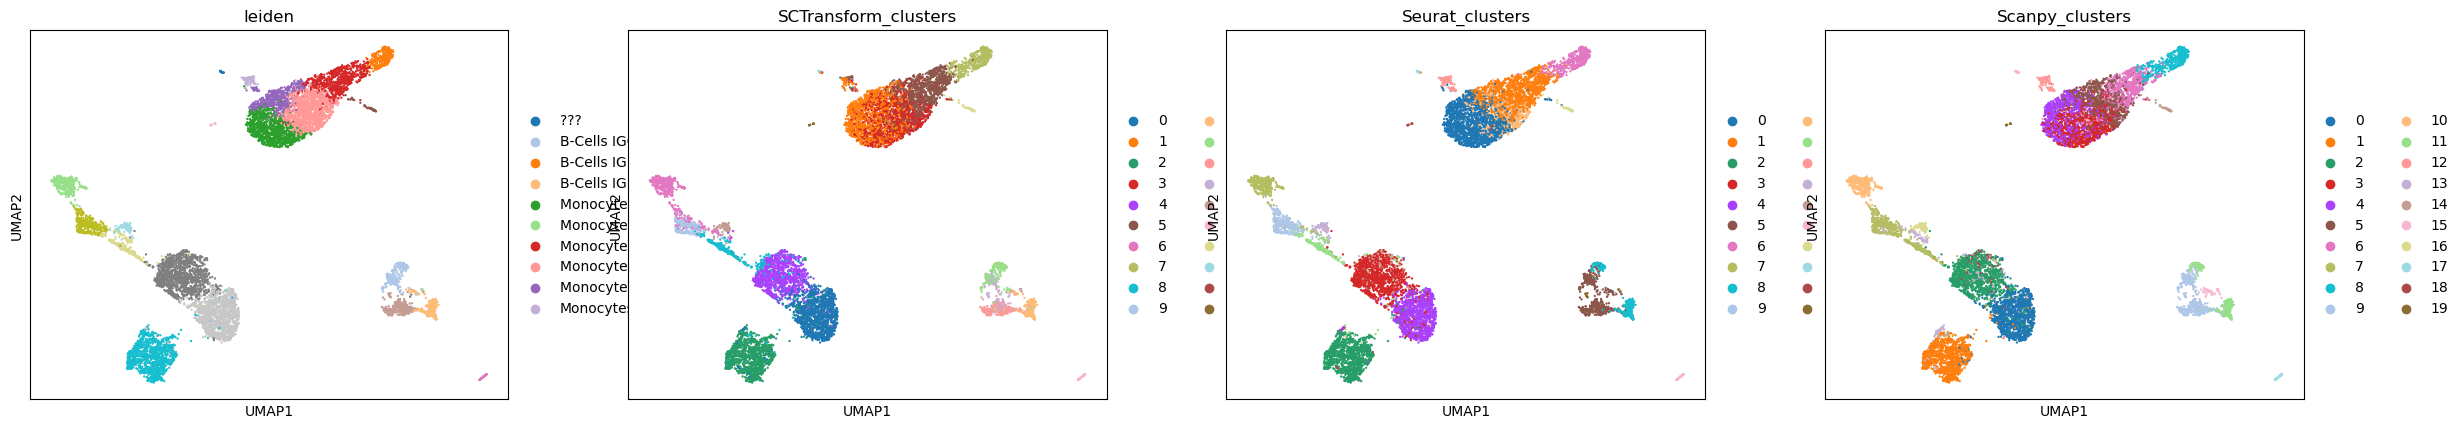

In [37]:
sc.pl.umap(pbmc_muffin, color=["leiden", "SCTransform_clusters","Seurat_clusters", "Scanpy_clusters"])

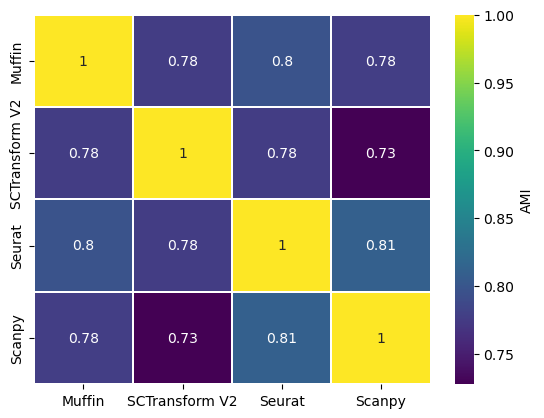

In [45]:
from sklearn.metrics import adjusted_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt
labels = ["Annotated clusters", "SCTransform_clusters", "Seurat_clusters", "Scanpy_clusters"]
ami_grid = pd.DataFrame(np.zeros((len(labels),len(labels))), index=labels, columns=labels)
for i in labels:
    for j in labels:
        ami_grid.loc[i, j] = adjusted_mutual_info_score(pbmc_muffin.obs[i].values, pbmc_muffin.obs[j].values, )

renamed = ["Muffin", "SCTransform V2", "Seurat", "Scanpy"]
ami_grid.columns = renamed
ami_grid.index = renamed
sns.heatmap(ami_grid, xticklabels=True, yticklabels=True, annot=True,
            cbar_kws={'label': 'AMI'},cmap="viridis", linecolor="w", linewidths=0.25)
plt.savefig("benchmarks/scrnaseq/cluster_ami.pdf")